In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [36]:
rule_x = lambda x,y,c: np.sin(x**2 - y**2 + c)
rule_y = lambda x,y,c: np.cos(2*x*y + c)

In [17]:
def boxInit(trajectory_number: int) -> np.array:
    x,y = np.zeros(trajectory_number), np.zeros(trajectory_number)
    k = trajectory_number//4
    x[:k], y[:k] = -1+2*np.random.rand(k), np.ones(k)
    x[3*k:], y[3*k:] = -1+2*np.random.rand(k), -np.ones(k)
    x[k:2*k], y[k:2*k] = np.ones(k), -1+2*np.random.rand(k)
    x[2*k:3*k], y[2*k:3*k] = -np.ones(k), -1+2*np.random.rand(k)
    return x,y

def calculateOrbitTrajectories(_trajectories: list | None = None, trajectory_length = 100, trajectory_number = 50, c1 = 3.522, c2 = 1.622):
    if _trajectories is None:
        _trajectories = list()
    x,y = np.zeros((trajectory_length,trajectory_number)), np.zeros((trajectory_length,trajectory_number))
    #x[0], y[0] = -1+2*np.random.rand(trajectory_number), -1+2*np.random.rand(trajectory_number)
    x[0], y[0] = boxInit(trajectory_number)

    for i in range(trajectory_length-1):
        new_x, new_y = rule_x(x[i], y[i],c1), rule_y(x[i], y[i],c2)
        x[i+1] = new_x
        y[i+1] = new_y
    for _x,_y in zip(x.T,y.T):
        _trajectories.append((_x,_y))
    return _trajectories

## Fixed Parameter Plot

<Axes: >

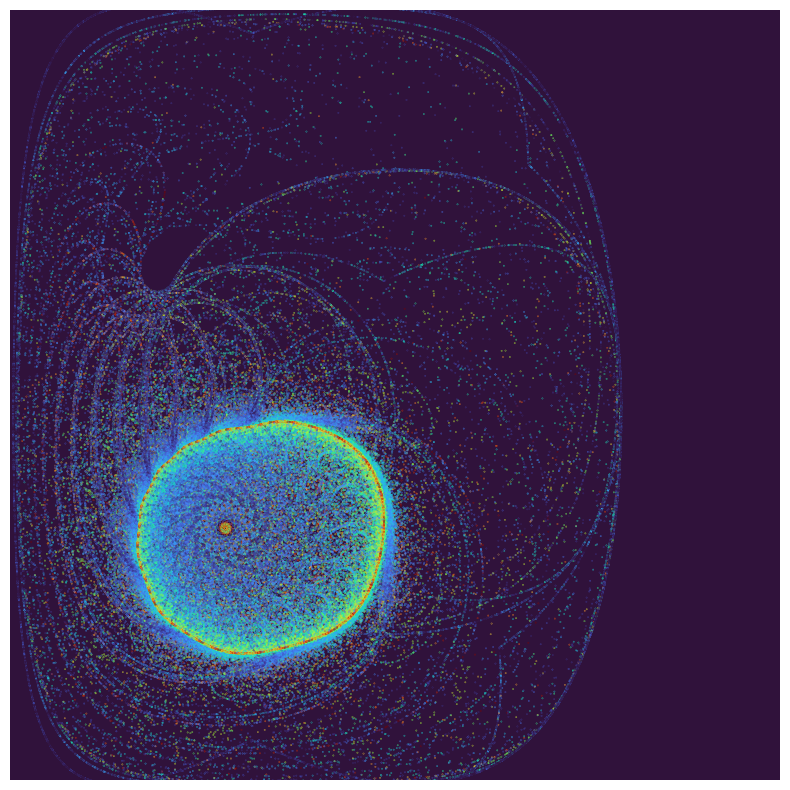

In [38]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

def plotTrajectory(ax, trajectory_number: int, c1: float, c2: float):

    # Generate some short and long trajectories
    trajectories = []
    calculateOrbitTrajectories(trajectories, trajectory_number = trajectory_number, trajectory_length = 10, c1 = c1, c2 = c2)
    calculateOrbitTrajectories(trajectories, trajectory_number = trajectory_number, trajectory_length = 50, c1 = c1, c2 = c2)
    calculateOrbitTrajectories(trajectories, trajectory_number = trajectory_number, trajectory_length = 250, c1 = c1, c2 = c2)

    # Stack all trajectories and do a histogram plot
    x = np.hstack([trajectory[0] for trajectory in trajectories])
    y = np.hstack([trajectory[1] for trajectory in trajectories])
    h, xedges, yedges = np.histogram2d(x, y, bins=300, range=[[-0.99,0.99],[-0.99,0.99]])
    ax.imshow(h.T, extent=[-0.99,0.99,-0.99,0.99], origin='lower', cmap='turbo')

    # Plot the trajectories on top of the histogram
    for trajectory in trajectories:
        x,y = trajectory
        ax.scatter(x, y, c=range(len(x)), cmap='turbo', s=0.05)

    # Set the aspect of the plot to be equal, limit accordingly and remove the axis
    ax.set_xlim(-0.99,0.99)
    ax.set_ylim(-0.99,0.99)
    ax.set_aspect('equal')
    ax.axis('off')

    return ax

# Set the parameters for the system
c1,c2 = 3.52, 1.622
N = 2000
plotTrajectory(ax, N, c1, c2)

## Animation

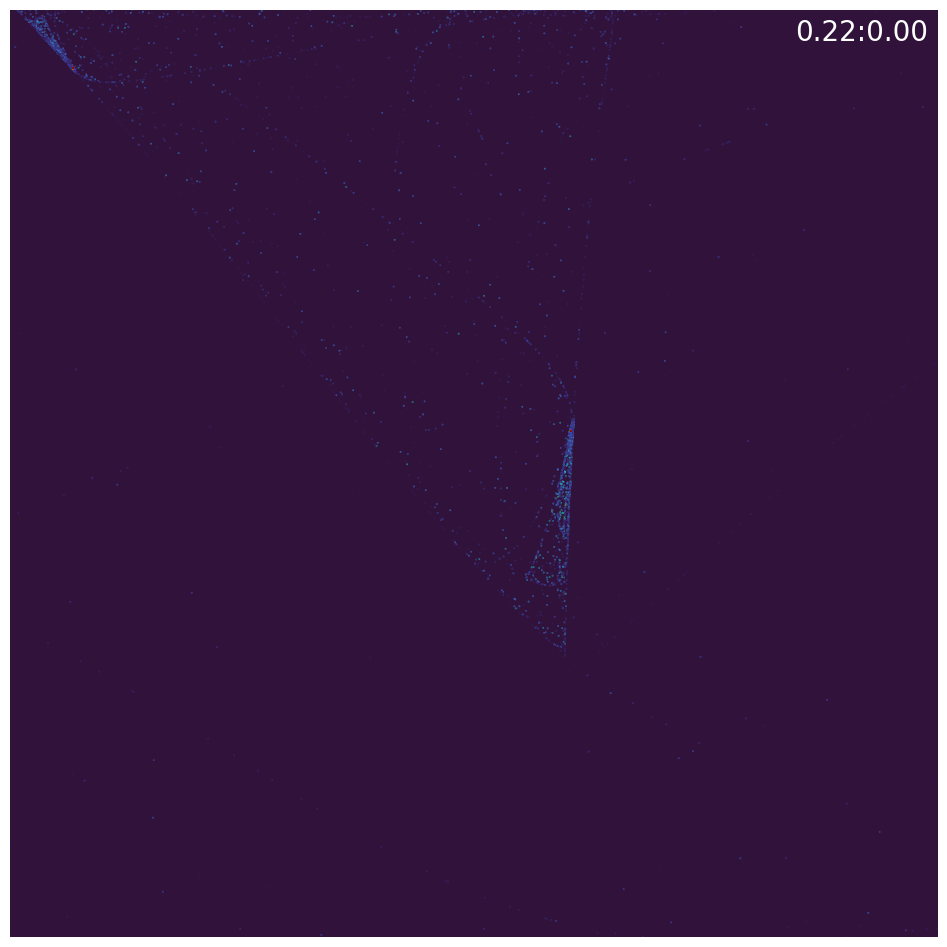

In [30]:
from matplotlib.animation import FuncAnimation

# Create a new figure and add a subplot
fig, ax = plt.subplots(1,1,figsize=(10,10))
plt.tight_layout()

# Set the parameters for the system
c1,c2 = 0.222, np.linspace(0,2*np.pi,500)
N = 260

# Create a function that updates the plot for each value of c2
def update(c2):
    ax.clear()
    plotTrajectory(ax, N, c1, c2)
    ax.text(0.99, 0.99, f"{c1:.2f}:{c2:.2f}", ha="right", va="top", fontsize=20, transform=ax.transAxes, color="white")
    print(f"Plot for c2 = {c2}", end="\r")

# Create the animation
ani = FuncAnimation(fig, update, frames=c2, interval=100)
ani.save(f"attractor_{c1}.mp4", fps=30)